# DL study ~23.01.15.

<질문>
1. 활성화 = 1, 비활성화 = 0 인가?
2. mnist.py 어떻게 불러오나?
3. minibatch gradient-descent method 오류?

## Ch2. 퍼셉트론

퍼셉트론은 입출력을 갖춘 알고리즘이다. 입력 단자와 출력 단자를 각각 뉴런(neuron) 혹은 노드(node)라고 하고, 인간이 수동적으로 가중치(W)와 편향(b)을 정하여 0 또는 1을 출력하는 하나의 알고리즘을 구축하는 과정이 곧 하나의 퍼셉트론(단층 퍼셉트론)을 만드는 과정이다.
이때 퍼셉트론을 여러 개 이어서(다층 퍼셉트론) 더 정교한 알고리즘을 만들어낼 수도 있다.

AND gate

In [1]:
# coding: utf-8
import numpy as np


def AND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = AND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 0
(0, 1) -> 0
(1, 1) -> 1


NAND gate

In [2]:
# coding: utf-8
import numpy as np


def NAND(x1, x2):
    x = np.array([x1, x2])
    w = np.array([-0.5, -0.5])
    b = 0.7
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = NAND(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 1
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


OR gate

In [3]:
# coding: utf-8
import numpy as np


def OR(x1, x2):
    x = np.array([x1, x2])
    w = np.array([0.5, 0.5])
    b = -0.2
    tmp = np.sum(w*x) + b
    if tmp <= 0:
        return 0
    else:
        return 1

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = OR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 1


XOR gate : 다층 퍼셉트론

In [4]:
def XOR(x1, x2):
    s1 = NAND(x1, x2)
    s2 = OR(x1, x2)
    y = AND(s1, s2)
    return y

if __name__ == '__main__':
    for xs in [(0, 0), (1, 0), (0, 1), (1, 1)]:
        y = XOR(xs[0], xs[1])
        print(str(xs) + " -> " + str(y))

(0, 0) -> 0
(1, 0) -> 1
(0, 1) -> 1
(1, 1) -> 0


## Ch3. 신경망

다층 퍼셉트론에서 지정할 가중치 및 편향을 기계가 스스로 학습하여 지정하는 알고리즘을 신경망이라고 한다. 이때 비선형 함수인 활성화 함수 h()를 지정하여, 입력값의 총합이 활성화 기준을 충족하는지 판단하여 출력값으로 변환하도록 한다. 대표적으로 계단함수(step function), 시그모이드 함수(sigmoid function), 소프트맥스 함수(Softmax function) 등을 활용한다(소프트맥스 함수의 경우 overflow 문제를 해결하기 위해 logC 등을 자연상수의 지수에 더해주기도 한다). 이 단원에서는 신경망의 순전파(forward)를 다룬다.

Step function & Sigmoid function
- Sigmoid function : 역전파학습에 활용(가중치를 다이얼 돌리듯이 세밀하게 조정) - 과적합(overfitting)문제 발생가능

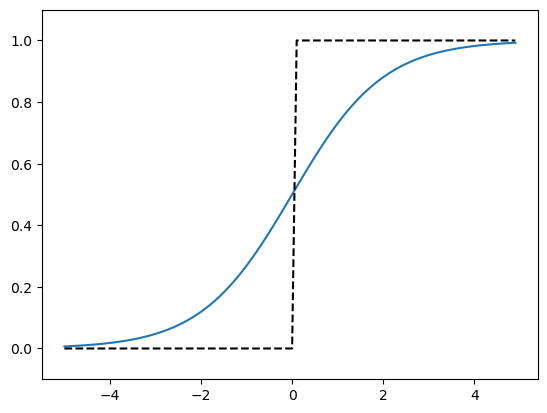

In [5]:
import matplotlib.pylab as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))    


def step_function(x):
    return np.array(x > 0, dtype=int)

x = np.arange(-5.0, 5.0, 0.1)
y1 = sigmoid(x)
y2 = step_function(x)

plt.plot(x, y1)
plt.plot(x, y2, 'k--')
plt.ylim(-0.1, 1.1) # y축 범위 지정
plt.show()

ReLU function : 0 이하의 입력값은 출력값 0을 출력하고, 0 초과의 입력값은 그대로 출력 <br>
- sigmoid function이 갖고 있는 문제점을 해결해줌!

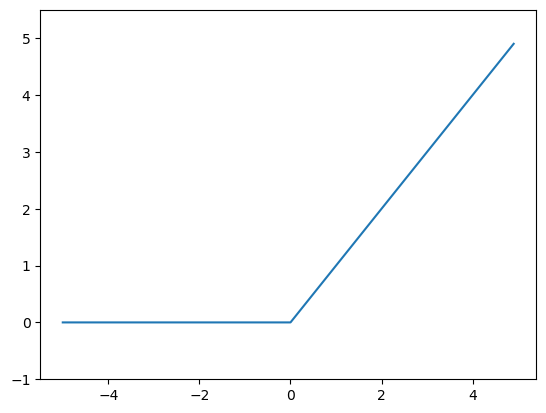

In [6]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)
plt.plot(x, y)
plt.ylim(-1.0, 5.5)
plt.show()

Softmax function : 분류할 때 마지막 출력 직전에 적용해서 "분류"를 잘 하는 데에 활용하는 활성화함수.

참고) 데이터 전처리 <br>
정규화 : 데이터의 크기를 공통된 범위로 변환 <br>
표준화 : 평균 0, 표준편차 1이 되도록 변환

#### Pytorch 사용

In [9]:
import torch
x = torch.randn(5,3)
print(x)

tensor([[-1.8634,  0.4533,  0.5314],
        [ 0.1739, -0.2884,  0.1772],
        [ 0.7611, -0.5559,  0.5330],
        [ 1.5777, -1.2015,  0.1239],
        [ 1.4165, -0.5356, -0.8058]])


mnist.py 데이터 활용(미해결)

In [8]:
import mnist
load_mnist(flatten=True, normalize=False)

NameError: name 'load_mnist' is not defined

## Pytorch 실습

### Lab 01-1,2. Tensor Manipulation

In [10]:
import numpy as np
import torch

1D Array with Pytorch

In [13]:
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)

tensor([0., 1., 2., 3., 4., 5., 6.])


In [14]:
print(t.dim())  # rank
print(t.shape)  # shape
print(t.size()) # shape
print(t[0], t[1], t[-1])  # Element
print(t[2:5], t[4:-1])    # Slicing
print(t[:2], t[3:])       # Slicing

1
torch.Size([7])
torch.Size([7])
tensor(0.) tensor(1.) tensor(6.)
tensor([2., 3., 4.]) tensor([4., 5.])
tensor([0., 1.]) tensor([3., 4., 5., 6.])


2D Array with Pytorch

In [15]:
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)

tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])


In [16]:
print(t.dim())  # rank
print(t.size()) # shape
print(t[:, 1])
print(t[:, 1].size())
print(t[:, :-1])

2
torch.Size([4, 3])
tensor([ 2.,  5.,  8., 11.])
torch.Size([4])
tensor([[ 1.,  2.],
        [ 4.,  5.],
        [ 7.,  8.],
        [10., 11.]])


### Lab 02. Introduction to Simple Linear Regression Model

공부한 시간과 점수의 상관관계를 알아보자. <br>
Training dataset : 1시간 공부했더니 2점, 2시간 공부했더니 4점, 3시간 공부했더니 6점 <br>
Test dataset : 4시간 공부했더니 어떻게 될까?

In [32]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [33]:
# For reproducibility
torch.manual_seed(1)

#### <Gradient-descent(경사하강법) 알고리즘 구축 과정>  <br>
**1. 데이터를 정의한다.**

In [34]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

**2. Hypothesis 초기화** <br>
W(가중치), b(편향)을 0으로 초기화 <br> W와 b를 학습시키는 것이 목적이므로 requires_grad=True로 해둠.

In [35]:
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
hypothesis = x_train * W + b

Mean Squared Error(MSE) = cost(W,b) = 얼마나 잘 예측했는지 판단하는 지표!

In [36]:
cost = torch.mean((hypothesis - y_train) ** 2)

**3. Optimizer 정의**

In [37]:
optimizer = optim.SGD([W, b], lr=0.01)

모델 개선 : torch.optim 라이브러리 사용 <br>
- [W, b]는 학습할 tensor들 <br>
- lr=0.01은 learning rate <br>


항상 붙어다니는 3줄 <br>
- zero_grad() : gradient 초기화
- backward() : gradient 계산
- step() : 개선

In [38]:
optimizer.zero_grad()
cost.backward()
optimizer.step()

**4. 학습을 원하는 만큼 for문을 돌린다!**

##### Full Training Code <br>
점점 $H(x)$의 $W$와 $b$를 조정해서 cost가 줄어들고 있음을 알 수 있다.

In [39]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])
# 모델 초기화
W = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train * W + b
    
    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/1000 W: 0.093, b: 0.040 Cost: 4.666667
Epoch  100/1000 W: 0.873, b: 0.289 Cost: 0.012043
Epoch  200/1000 W: 0.900, b: 0.227 Cost: 0.007442
Epoch  300/1000 W: 0.921, b: 0.179 Cost: 0.004598
Epoch  400/1000 W: 0.938, b: 0.140 Cost: 0.002842
Epoch  500/1000 W: 0.951, b: 0.110 Cost: 0.001756
Epoch  600/1000 W: 0.962, b: 0.087 Cost: 0.001085
Epoch  700/1000 W: 0.970, b: 0.068 Cost: 0.000670
Epoch  800/1000 W: 0.976, b: 0.054 Cost: 0.000414
Epoch  900/1000 W: 0.981, b: 0.042 Cost: 0.000256
Epoch 1000/1000 W: 0.985, b: 0.033 Cost: 0.000158


### Lab 03. Deeper look to Gradient-descent method

In [62]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1, 1) # x 1개 y 1개 (단순선형회귀모형)

    def forward(self, x): # Hypothesis 어떻게 계산하는지 정의하는 부분
        return self.linear(x)

기본적으로 PyTorch의 모든 모델은 제공되는 nn.Module을 상속받아서 만든다.

##### Full Training Code

In [50]:
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[1], [2], [3]])

# 모델 초기화
model = LinearRegressionModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.01)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        params = list(model.parameters())
        W = params[0].item()
        b = params[1].item()
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, W, b, cost.item()
        ))

Epoch    0/1000 W: -0.114, b: 0.547 Cost: 4.589475
Epoch  100/1000 W: 0.700, b: 0.683 Cost: 0.067199
Epoch  200/1000 W: 0.764, b: 0.537 Cost: 0.041525
Epoch  300/1000 W: 0.814, b: 0.422 Cost: 0.025660
Epoch  400/1000 W: 0.854, b: 0.332 Cost: 0.015856
Epoch  500/1000 W: 0.885, b: 0.261 Cost: 0.009798
Epoch  600/1000 W: 0.910, b: 0.205 Cost: 0.006055
Epoch  700/1000 W: 0.929, b: 0.161 Cost: 0.003741
Epoch  800/1000 W: 0.944, b: 0.127 Cost: 0.002312
Epoch  900/1000 W: 0.956, b: 0.100 Cost: 0.001429
Epoch 1000/1000 W: 0.966, b: 0.078 Cost: 0.000883


### Lab 04-1. Multivariate Linear Regression Model

이번에는 X가 3개인 다중선형회귀모형을 구축해본다. 단계는 똑같음!

##### Full Training Code

In [54]:
# 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

# 모델 초기화
w1 = torch.zeros(1, requires_grad=True)
w2 = torch.zeros(1, requires_grad=True)
w3 = torch.zeros(1, requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([w1, w2, w3, b], lr=1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x1_train * w1 + x2_train * w2 + x3_train * w3 + b

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w3.item(), w3.item(), b.item(), cost.item()
        ))

Epoch    0/1000 w1: 0.294 w2: 0.297 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.676 w3: 0.676 b: 0.008 Cost: 1.563634
Epoch  200/1000 w1: 0.679 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.497607
Epoch  300/1000 w1: 0.684 w2: 0.677 w3: 0.677 b: 0.008 Cost: 1.435026
Epoch  400/1000 w1: 0.689 w2: 0.678 w3: 0.678 b: 0.008 Cost: 1.375730
Epoch  500/1000 w1: 0.694 w2: 0.678 w3: 0.678 b: 0.009 Cost: 1.319511
Epoch  600/1000 w1: 0.699 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.215696
Epoch  800/1000 w1: 0.709 w2: 0.679 w3: 0.679 b: 0.009 Cost: 1.167818
Epoch  900/1000 w1: 0.713 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.680 w3: 0.680 b: 0.009 Cost: 1.079378


더 많은 정보를 처리하기 위해 torch의 matmul() 함수를 활용해본다. <br>
matmul() : matrix multiplication의 준말! <br>

In [64]:
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

##### Full Training Code

In [56]:
# 모델 초기화
W = torch.zeros((3, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    
    # H(x) 계산
    hypothesis = x_train.matmul(W) + b # or .mm or @

    # cost 계산
    cost = torch.mean((hypothesis - y_train) ** 2)

    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    # 100번마다 로그 출력
    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([67.2578, 80.8397, 79.6523, 86.7394, 61.6605]) Cost: 9298.520508
Epoch    2/20 hypothesis: tensor([104.9128, 126.0990, 124.2466, 135.3015,  96.1821]) Cost: 2915.712402
Epoch    3/20 hypothesis: tensor([125.9942, 151.4381, 149.2133, 162.4896, 115.5097]) Cost: 915.040649
Epoch    4/20 hypothesis: tensor([137.7967, 165.6247, 163.1911, 177.7112, 126.3307]) Cost: 287.936157
Epoch    5/20 hypothesis: tensor([144.4044, 173.5674, 171.0168, 186.2332, 132.3891]) Cost: 91.371010
Epoch    6/20 hypothesis: tensor([148.1035, 178.0143, 175.3980, 191.0042, 135.7812]) Cost: 29.758249
Epoch    7/20 hypothesis: tensor([150.1744, 180.5042, 177.8509, 193.6753, 137.6805]) Cost: 10.445281
Epoch    8/20 hypothesis: tensor([151.3336, 181.8983, 179.2240, 195.1707, 138.7440]) Cost: 4.391237
Epoch    9/20 hypothesis: tensor([151.9824, 182.6789, 179.9928, 196.0079, 139.3396]) Cost: 2.493121
Epoch   10/20 hypo

결국 단순선형회귀모형과 달라지는 지점은 데이터를 정의하는 지점과 W를 정의하는 지점일 뿐이다.

이번에는 nn.Module을 상속받아서 모형을 구축해본다.

In [61]:
class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3, 1) # x 3개 y 1개

    def forward(self, x): # Hypothesis 어떻게 계산하는지 정의하는 부분
        return self.linear(x)

In [60]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])
# 모델 초기화
model = MultivariateLinearRegressionModel()
# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20
for epoch in range(nb_epochs+1):
    
    # H(x) 계산
    prediction = model(x_train)
    
    # cost 계산
    cost = F.mse_loss(prediction, y_train)
    
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    
    # 20번마다 로그 출력
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/20 Cost: 31362.457031
Epoch    1/20 Cost: 9830.650391
Epoch    2/20 Cost: 3081.570801
Epoch    3/20 Cost: 966.092957
Epoch    4/20 Cost: 303.002594
Epoch    5/20 Cost: 95.159134
Epoch    6/20 Cost: 30.011410
Epoch    7/20 Cost: 9.590994
Epoch    8/20 Cost: 3.190278
Epoch    9/20 Cost: 1.183925
Epoch   10/20 Cost: 0.555076
Epoch   11/20 Cost: 0.357949
Epoch   12/20 Cost: 0.296167
Epoch   13/20 Cost: 0.276782
Epoch   14/20 Cost: 0.270711
Epoch   15/20 Cost: 0.268800
Epoch   16/20 Cost: 0.268205
Epoch   17/20 Cost: 0.268014
Epoch   18/20 Cost: 0.267945
Epoch   19/20 Cost: 0.267922
Epoch   20/20 Cost: 0.267907


### Lab 04-2. Loading big data

방대한 양의 data를 pytorch에서 처리하기 위해 어떻게 해야 하는가? <br>
데이터가 너무 많으면, Gradient-descent 방법은 너무 오래걸린다. 그러면 일부분만 학습하면 어떨까? <br>
**"Minibatch" Gradient-descent 방법 : 전체 데이터를 여러 개의 minibatch로 나누어서(균일) 하나씩 학습해보자!** <br>
**-> for문을 두 번 쓰게 됨(첫 for문은 minibatch의 개수만큼 반복)** <br>
이렇게 되면 컴퓨터에 덜 무리가 간다. 업데이트를 좀 더 빠르게 할 수 있다. 그러나 전체 데이터를 쓰지 않아서 잘못된 방향으로 업데이트가 될 수도 있다.

##### Full Training Code

torch.utils.data.Dataset을 상속받는다. <br>
__len__() : 이 데이터셋의 총 데이터 수 <br>
__getitem()__ : 어떠한 인덱스 idx를 받았을 때, 그에 상응하는 데이터 반환

In [68]:
from torch.utils.data import Dataset

class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                       [93, 88, 91],
                       [89, 91, 90],
                       [96, 98, 100],
                       [73, 66, 70]]
        self.y_data = [[152],[185], [180], [196], [142]]
    
    def __len__(self):
        return len(self.x_data)
    
    def __getitem(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        
        return x, y

dataset = CustomDataset()

batch_size : 각 minibatch의 크기인데 통상적으로 2의 제곱수로 설정한다. <br>
shuffle=True : Epoch마다 데이터셋을 섞어서 데이터가 학습되는 순서를 바꿔준다.

In [70]:
from torch.utils.data import DataLoader

dataloader = DataLoader(
    dataset,
    batch_size=2,
    shuffle=True
)

enumerate(dataloader) : minibatch 인덱스와 데이터를 받는다. <br>
len(dataloader) : 한 epoch 당 minibatch 개수

In [71]:
nb_epochs = 20
for epoch in range(nb_epochs + 1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        
        # H(x) 계산
        prediction = model(x_train)
        
        # cost계산
        cost = F.mse_loss(prediction, y_train)
        
        # cost로 H(x) 계산
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(epoch, nb_epochs, batch_idx+1, len(dataloader), cost.item()))

NotImplementedError: 

In [1]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):

    # H(x) 계산
    prediction = model(x_train)
    # model(x_train)은 model.forward(x_train)와 동일함.

    # cost 계산
    cost = F.mse_loss(prediction, y_train) # <== 파이토치에서 제공하는 평균 제곱 오차 함수

    # cost로 H(x) 개선하는 부분
    # gradient를 0으로 초기화
    optimizer.zero_grad()
    # 비용 함수를 미분하여 gradient 계산
    cost.backward()
    # W와 b를 업데이트
    optimizer.step()

    if epoch % 100 == 0:
    # 100번마다 로그 출력
      print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

NameError: name 'model' is not defined